In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [66]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx', 'implementation_names.xlsx', 'query.xlsx', 'count_implementation_rate.xlsx', 'count_sql.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,airbyte,infrastructure management,0,1,0,0,0,0,0
2,airsonic,media,1,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,1,0,0,1,0
4,nacos,infrastructure management,1,0,0,0,0,0,0


In [41]:
data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
data_with_index = data_with_index.drop(columns='JPA')
data_with_index.head()

,Domains,mybatis,jOOQ,Spring,JDBC,Hibernate,EclipseLink
Projects,,,,,,,
Activiti,automation,1,0,1,0,1,0
airbyte,infrastructure management,0,1,0,0,0,0
airsonic,media,1,0,0,0,0,1
spring-cloud-alibaba,infrastructure management,0,0,1,0,1,0
nacos,infrastructure management,1,0,0,0,0,0


In [47]:
data_jpa = df[["Projects", "Domains", "JPA"]].copy()
data_jpa.iloc[: , 2:].sum().sort_values(ascending=False)

JPA    67
dtype: int64

In [48]:
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False)

mybatis        155
Hibernate       94
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

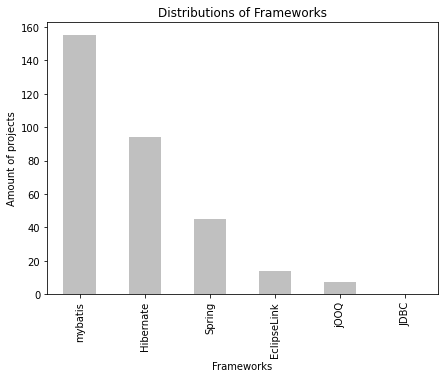

In [49]:
plt.figure(figsize=(7,5))
data_with_index.iloc[: , 1:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Frameworks", color='silver')
plt.xlabel("Frameworks")
plt.ylabel("Amount of projects")
plt.show() 

In [50]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()
#data_with_index = df.set_index("Projects")
#data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
#data_with_index.reset_index(inplace=True)

,Projects,DB-Code(Java),DB-Code(XML),Dependencies,Total-DB,Total-Project,Rate
0,Activiti,0,62,1,63,4899,1.285977
1,che,0,25,1,26,2538,1.024429
2,pinpoint,0,3,1,4,8149,0.049086
3,skywalking,0,3,1,4,2587,0.154619
4,wildfly,0,1,1,2,14079,0.014206


In [51]:
data_with_index = df.iloc[: , :].sort_values(by='Total-DB', ascending=False)
data_with_index.head()

,Projects,DB-Code(Java),DB-Code(XML),Dependencies,Total-DB,Total-Project,Rate
0,Activiti,0,62,1,63,4899,1.285977
1,che,0,25,1,26,2538,1.024429
2,pinpoint,0,3,1,4,8149,0.049086
3,skywalking,0,3,1,4,2587,0.154619
4,wildfly,0,1,1,2,14079,0.014206


<AxesSubplot:>

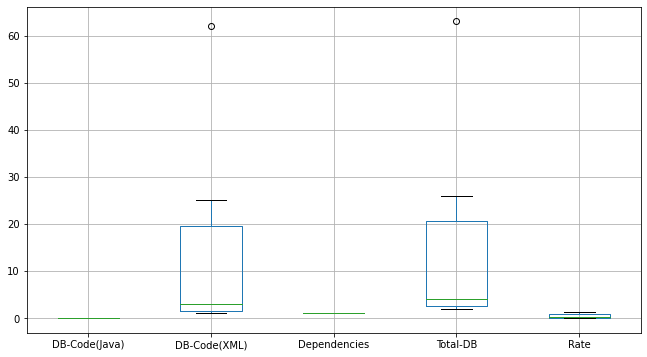

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize =(11, 6))
df.boxplot(column=['DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Rate'])

In [53]:
from apyori import apriori

rules = apriori(data_with_index, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
results = pd.DataFrame(results)
results.head(5)

,items,support,ordered_statistics
0,"((, ))",0.285714,"[(((), ()), 1.0, 3.5), (()), ((), 1.0, 3.5)]"
1,"((, C)",0.285714,"[(((), (C), 1.0, 3.5), ((C), ((), 1.0, 3.5)]"
2,"((, J)",0.142857,"[(((), (J), 0.5, 3.5), ((J), ((), 1.0, 3.5)]"
3,"((, L)",0.142857,"[(((), (L), 0.5, 3.5), ((L), ((), 1.0, 3.5)]"
4,"((, M)",0.142857,"[(((), (M), 0.5, 3.5), ((M), ((), 1.0, 3.5)]"


In [54]:
from mlxtend.frequent_patterns import apriori, association_rules

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df = df.iloc[: , 2:]

frq_items = apriori(df, min_support = 0.01, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values('lift', ascending =False)
rules = rules[rules['consequents'].apply(lambda x: len(x)) == 1]
rules[rules['antecedents'] == {'JPA'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(JPA),(EclipseLink),0.208075,0.043478,0.034161,0.164179,3.776119,0.025115,1.144410
11,(JPA),(Spring),0.208075,0.139752,0.065217,0.313433,2.242786,0.036139,1.252971
17,(JPA),(Hibernate),0.208075,0.291925,0.121118,0.582090,1.993966,0.060376,1.694321
3,(JPA),(mybatis),0.208075,0.481366,0.158385,0.761194,1.581319,0.058225,2.171778


In [55]:
USAGE_FAN_IN_FILE_PATH = RESOURCE_DIR + os.sep + "usage_fan_in_file.xlsx"
df_usage_fan_in = pd.read_excel(USAGE_FAN_IN_FILE_PATH, engine = 'openpyxl')

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[2]
implementation = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

implementation_usage = pd.merge(implementation, df_usage_fan_in, how = 'inner', on = 'Projects')
implementation_usage = implementation_usage.drop(columns=['Domains', 'DB-Code(Java)', 'DB-Code(XML)', 'Dependencies', 'Total-DB', 'Total-Project' ])
implementation_usage.head()

,Projects,EclipseLink,Spring,JDBC,mybatis,Hibernate,jOOQ,JPA,Rate
0,Activiti,NaN,Spring,NaN,mybatis,Hibernate,NaN,JPA,1.285977
1,che,EclipseLink,Spring,NaN,mybatis,NaN,NaN,JPA,1.024429
2,pinpoint,NaN,Spring,NaN,mybatis,NaN,NaN,NaN,0.049086
3,skywalking,NaN,NaN,NaN,NaN,Hibernate,NaN,JPA,0.154619
4,wildfly,EclipseLink,Spring,NaN,mybatis,Hibernate,NaN,JPA,0.014206


In [56]:
#implementation_usage = implementation_usage.drop(columns='Projects')

new_frameworks_list = []
new_frameworks_list_string = []

frameworks_list = implementation_usage.iloc[: , 2:7].values.tolist()  

for i in frameworks_list:
    new_frameworks_list_not_null = [x for x in i if pd.isnull(x) == False]
    new_frameworks_list_string = '/'.join([str(item) for item in new_frameworks_list_not_null])
    new_frameworks_list.append(new_frameworks_list_string)

df_implementation_usage = implementation_usage.iloc[: , 8:]
df_implementation_usage = df_implementation_usage.assign(ListFrameworks = new_frameworks_list)

#print(df_implementation_usage)

df_group_implementation_usage = df_implementation_usage.groupby('ListFrameworks')['Rate'].apply(list).reset_index(name='NumberDBFiles')

df_group_implementation_usage.head()

,ListFrameworks,NumberDBFiles
0,Hibernate,[0.154619250096637]
1,Spring/mybatis,"[1.024428684003152, 0.04908577739599951]"
2,Spring/mybatis/Hibernate,"[1.285976729944887, 0.01420555437175936]"
3,Spring/mybatis/jOOQ,[0.05885815185403178]


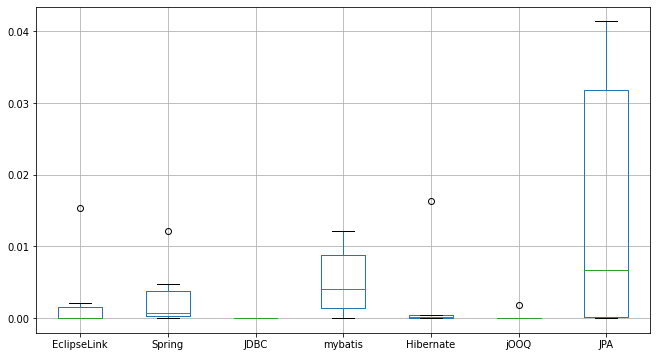

In [57]:
import matplotlib.pyplot as plt

CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[4]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.head()

plt.figure(figsize =(11, 6))
df.boxplot(return_type='axes');

In [73]:
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[3]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
df.rename(columns = {'(Ignore, SQL)':'SQL'}, inplace = True)
df.head()

,Projects,Domains,Builder,SQL
0,Activiti,automation,1,1
1,che,software development,0,1
2,pinpoint,monitoring,0,1
3,skywalking,monitoring,1,1
4,wildfly,infrastructure management,0,1


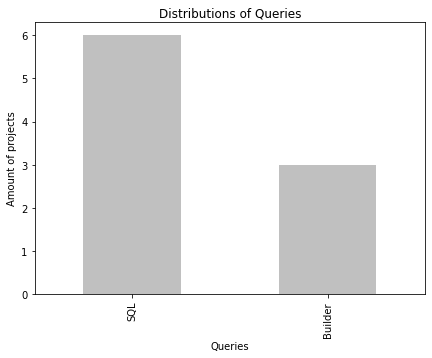

In [74]:
plt.figure(figsize=(7,5))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Queries", color='silver')
plt.xlabel("Queries")
plt.ylabel("Amount of projects")
plt.show()

In [75]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df_count_2 = df[df.SumPerProject == 2].count()
print(df_count_2)
df_count_sql = df[df.SQL ==1].count()
print(df_count_sql)
df_count_builder = df[df.Builder == 1].count()
print(df_count_builder)
df_count_0 = df[df.SumPerProject == 0].count()
print(df_count_0)

Projects         3
Domains          3
Builder          3
SQL              3
SumPerProject    3
dtype: int64
Projects         6
Domains          6
Builder          6
SQL              6
SumPerProject    6
dtype: int64
Projects         3
Domains          3
Builder          3
SQL              3
SumPerProject    3
dtype: int64
Projects         0
Domains          0
Builder          0
SQL              0
SumPerProject    0
dtype: int64


<ipython-input-75-b28d7cd082a8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[:,'SumPerProject'] = df.sum(axis=1)


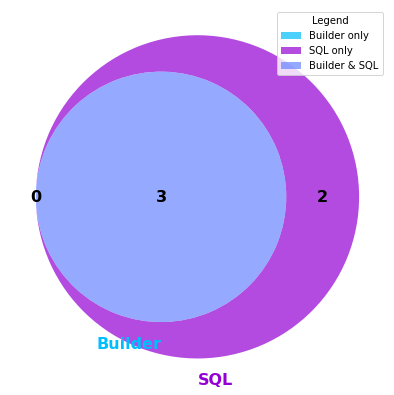

In [57]:
from collections import Counter
from matplotlib_venn import venn2

type_characterization = ['query.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')

AB_overlap = 0
A_rest = 0
B_rest = 0

for i in range(len(df)):
    if (df.at[i,'Builder'] == df.at[i, 'SQL']):
        AB_overlap += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'SQL'] == 1):
        B_rest += 1
    elif (df.at[i,'Builder'] != df.at[i, 'SQL']) and (df.at[i,'Builder'] == 1):
        A_rest += 1

sets = Counter()
sets['10'] = A_rest
sets['01'] = B_rest
sets['11'] = AB_overlap

labels = ('Builder', 'SQL')
plt.figure(figsize=(7,7))
ax = plt.gca()
colors = ['deepskyblue','darkviolet']
v = venn2(subsets=sets, set_labels=labels, ax=ax,set_colors= colors, alpha=0.7)

i = 0
for text in v.set_labels:
  text.set_color(colors[i])
  text.set_fontsize(16)
  text.set_fontweight('bold')
  i+=1
  
for text in v.subset_labels:
  text.set_color('black')
  text.set_fontsize(16)
  text.set_fontweight('bold')
  
h = [] 
for i in sets:
    h.append(v.get_patch_by_id(i)) 
l = ['Builder only','SQL only','Builder & SQL']
ax.legend(handles=h, labels=l, title="Legend",loc='upper right')  

plt.show()